# Stock Analysis

## Extracting stock data using python library yfinance

In [15]:
!pip install yfinance
!pip install matplotlib
!pip install pandas==1.3.3

  Using cached pandas-1.3.3.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "/private/va

In [17]:
import yfinance as yf

In [19]:
import pandas as pd

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.



In [21]:
apple=yf.Ticker("APPL")

We need to install wget command in terminal

In [23]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-01-01 08:44:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.2’

apple.json.2        100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-01-01 08:44:22 (418 MB/s) - ‘apple.json.2’ saved [5699/5699]



In [5]:
#extract information about the stock as a Python dictionary.
import json 
with open('apple.json') as json_file:
    apple_info =json.load(json_file)

apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [25]:
apple_info['country']

'United States'

In [51]:
#Using the period parameter we can set how far back from the present to get data. 
#The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.
apple_share_price_data = apple.history(period="max")
print(apple_share_price_data)

                                 Open        High         Low       Close  \
Date                                                                        
1980-12-12 00:00:00-05:00    0.098834    0.099264    0.098834    0.098834   
1980-12-15 00:00:00-05:00    0.094108    0.094108    0.093678    0.093678   
1980-12-16 00:00:00-05:00    0.087232    0.087232    0.086802    0.086802   
1980-12-17 00:00:00-05:00    0.088951    0.089381    0.088951    0.088951   
1980-12-18 00:00:00-05:00    0.091530    0.091959    0.091530    0.091530   
...                               ...         ...         ...         ...   
2024-12-24 00:00:00-05:00  255.490005  258.209991  255.289993  258.200012   
2024-12-26 00:00:00-05:00  258.190002  260.100006  257.630005  259.019989   
2024-12-27 00:00:00-05:00  257.829987  258.700012  253.059998  255.589996   
2024-12-30 00:00:00-05:00  252.229996  253.500000  250.750000  252.199997   
2024-12-31 00:00:00-05:00  252.440002  253.279999  249.429993  250.419998   

In [53]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [55]:
apple_share_price_data.reset_index(inplace=True)

In [59]:
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


<Axes: xlabel='Date'>

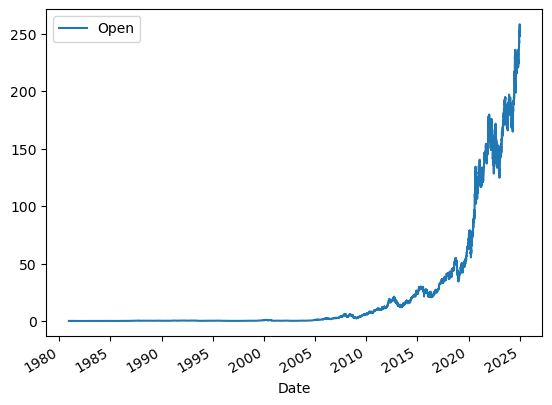

In [57]:
apple_share_price_data.plot(x="Date", y="Open")

In [61]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
Name: Dividends, Length: 85, dtype: float64

<Axes: xlabel='Date'>

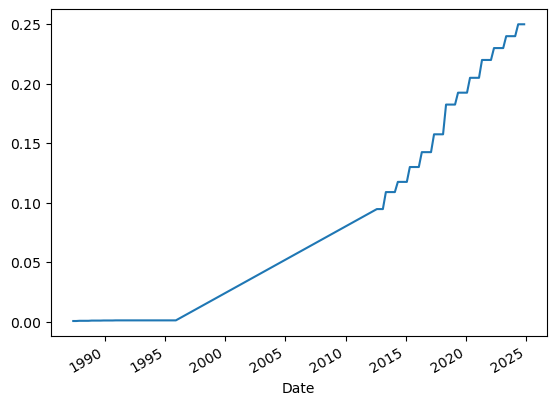

In [63]:
apple.dividends.plot()

In [65]:
import yfinance as yf
# Download historical data for a stock
msft = yf.Ticker("MSFT")
msft_data = msft.history(period="max")
# Display the downloaded data
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059946,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059947,0.063158,0.059947,0.062087,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059947,0.060482,47894400,0.0,0.0


### AMD (Advanced Micro Devices)

In [70]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-01-01 09:26:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-01-01 09:26:56 (928 MB/s) - ‘amd.json’ saved [5838/5838]



In [72]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [76]:
amd_info['country'] #country the stock belongs to

'United States'

In [78]:
amd_info['sector'] #secotr the stock belongs to

'Technology'

In [82]:
amd=yf.Ticker("AMD")
amd_share_price_data = amd.history(period="max")
print(amd_share_price_data)

                                 Open        High         Low       Close  \
Date                                                                        
1980-03-17 00:00:00-05:00    0.000000    3.302083    3.125000    3.145833   
1980-03-18 00:00:00-05:00    0.000000    3.125000    2.937500    3.031250   
1980-03-19 00:00:00-05:00    0.000000    3.083333    3.020833    3.041667   
1980-03-20 00:00:00-05:00    0.000000    3.062500    3.010417    3.010417   
1980-03-21 00:00:00-05:00    0.000000    3.020833    2.906250    2.916667   
...                               ...         ...         ...         ...   
2024-12-24 00:00:00-05:00  127.510002  127.510002  124.660004  126.290001   
2024-12-26 00:00:00-05:00  125.519997  127.300003  125.050003  125.059998   
2024-12-27 00:00:00-05:00  124.370003  126.180000  122.260002  125.190002   
2024-12-30 00:00:00-05:00  123.559998  124.099998  122.349998  122.440002   
2024-12-31 00:00:00-05:00  123.099998  123.550003  120.139999  120.790001   

## Extracting stock data using Web Scrapping

In [91]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [93]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [95]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [109]:
# The requests.get() method takes a URL as its first argument,
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [107]:
# .text method for extracting the HTML content as a string
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

In [111]:
# create beautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

In [134]:
title = soup.title.string  # or soup.find('title').string
print("Page Title:", title)

Page Title: Netflix, Inc. (NFLX) Stock Historical Prices & Data - Yahoo Finance


In [115]:
# create an empty dataframe with columns using pandas
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [117]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    

In [119]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


## Extracting data using `pandas` library

In [124]:
read_html_pandas_data = pd.read_html(url)

In [126]:
read_html_pandas_data = pd.read_html(str(soup))

In [128]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


## Define Graphing Function

In [198]:
#define the functioin make_graph
#don’t need to redefine the function for plotting graphs anywhere else in this notebook
from plotly.subplots import make_subplots
import plotly.graph_objects as go


def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### To remove $ and , from the output

In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

## End to End Synatx

### Extracting Tesla Data

In [156]:
Tesla=yf.Ticker("TSLA")   #which stock data we want

In [158]:
tesla_data = Tesla.history(period="max") #Using the ticker object and the function history extract 
                                         #stock information and save it in a dataframe named tesla_data
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-12-24 00:00:00-05:00  435.899994  462.779999  435.140015  462.279999   
2024-12-26 00:00:00-05:00  465.160004  465.329987  451.019989  454.130005   
2024-12-27 00:00:00-05:00  449.519989  450.000000  426.500000  431.660004   
2024-12-30 00:00:00-05:00  419.399994  427.000000  415.750000  417.410004   
2024-12-31 00:00:00-05:00  423.790009  427.929993  402.540009  403.839996   

In [160]:
tesla_data.reset_index(inplace=True)
print(tesla_data)

                          Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3647 2024-12-24 00:00:00-05:00  435.899994  462.779999  435.140015   
3648 2024-12-26 00:00:00-05:00  465.160004  465.329987  451.019989   
3649 2024-12-27 00:00:00-05:00  449.519989  450.000000  426.500000   
3650 2024-12-30 00:00:00-05:00  419.399994  427.000000  415.750000   
3651 2024-12-31 00:00:00-05:00  423.790009  427.929993  402.540009   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  257806500        0.0           

### Using webscrapping to extract tesla revenue data

In [166]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

In [170]:
soup = BeautifulSoup(html_data, 'html.parser') #Parse the html data

In [172]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"]) #extract table
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [174]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r'[,\$]', '', regex=True) #remove $

In [182]:
tesla_revenue.dropna(inplace=True) #remove null or empty strings

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


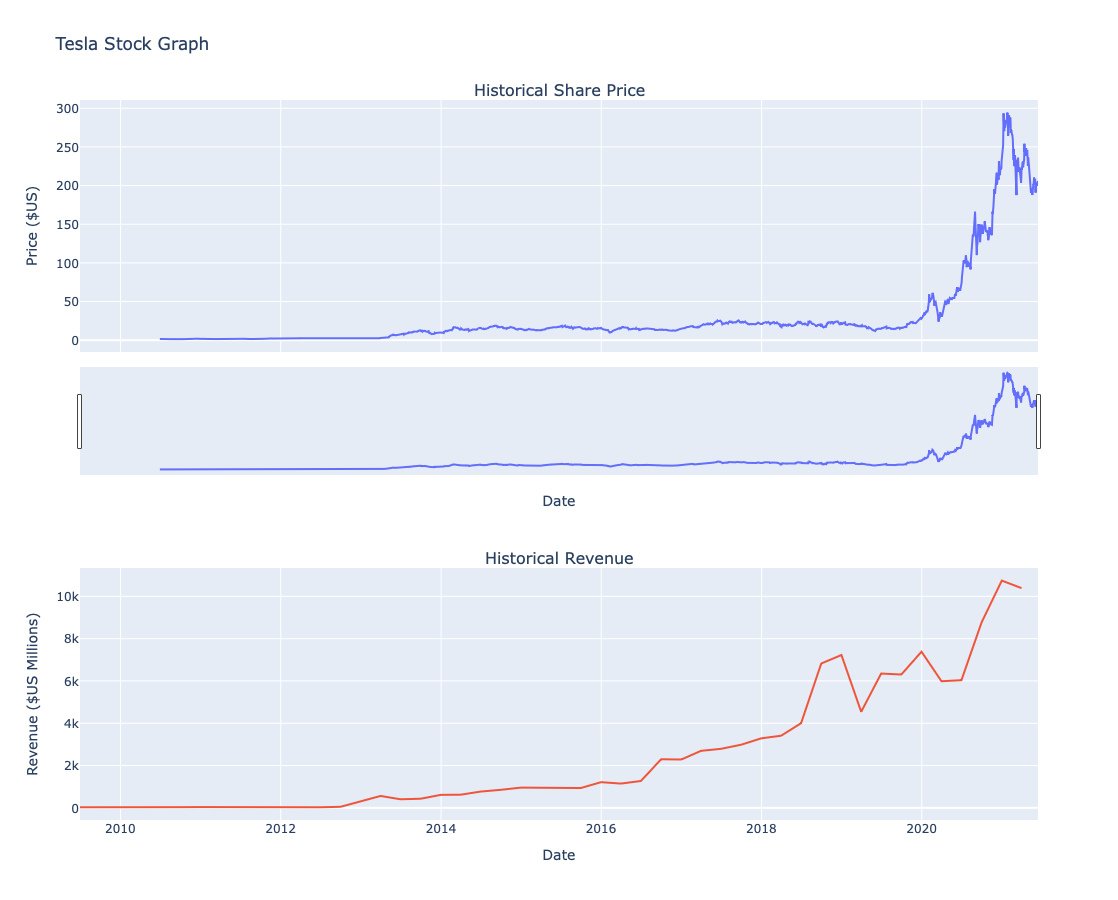

In [202]:
# Call the function
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Graph')